# Практическое задание 1. Моделирование пучка с заданным распределением интенсивности
### Постановка задачи
Разработать  приложение,  генерирующее  случайные  начальные  координаты  фотона  в 
осесимметричном  пучке,  радиальное  распределение  интенсивности  которого  описывается 
следующей функцией:
$$p(r)=const$$
$$r \in [\alpha_1, \alpha_2]$$
Входные параметры приложения: 
- количество фотонов $N$
- внутренний и внешний радиусы пучка $\alpha_1$ и $\alpha_2$

Выходные параметры:  
- распределение $N$ случайных положений фотона в плоскости $XY$ начала пучка,  
- осевое сечение плотности распределения точек в сравнении с аналитической кривой.

### Решение
Плотность в декартовых координатах имеет вид:
$$f_\xi(x,y)=\frac{1}{\pi(\alpha_2^2-\alpha_1^2)}$$
  
Проверим условие нормировки:
$$\frac{1}{\pi const(\alpha_2^2-\alpha_1^2)}\int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty}constdxdy=\frac{1}{\pi (\alpha_2^2-\alpha_1^2)}\int\limits_{0}^{2\pi}d\phi \int\limits_{\alpha_1}^{\alpha_2}rdr=1$$

Найдем функцию распеделения:


$$
F_\xi(r)=\frac{1}{2\pi} \int\limits_{0}^{2\pi}d\phi \int\limits_{\alpha_1}^{r}\frac{2\rho}{(\alpha_2^2-\alpha_1^2)} d\rho=\frac{r^2-\alpha_1^2}{\alpha_2^2-\alpha_1^2}
$$

Выразим радиус через значение функции распределения:
$$r=\sqrt{F_\xi(\alpha_2^2-\alpha_1^2)+\alpha_1^2}$$
Для моделирования случайной величины будем брать равномерно распределенную на отрезке $[0,1]$ случайную величину за значение $F_\xi$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

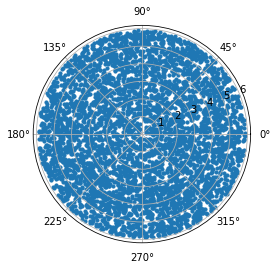

In [43]:
N = 5000   # Количество фотонов
a1 = 0.2   # Внутренний радиус пучка
a2 = 5.9   # Внешний радиус пучка
    
def f(r):  # Плотность распределения
    if a1 <= r <= a2:
        return 2*r/(a2**2-a1**2)
    else: 
        return 0.

def get_r(): # Радиус, выраженный через значение функции распределения
    return np.sqrt((a2**2-a1**2)*np.random.uniform(0, 1)+a1**2)
    
    
    

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
phis = 2 * np.pi * np.random.rand(N)
rhos = []
for i in range(N):
    rhos.append(get_r())
ax.scatter(phis, rhos, s=10)
plt.show()


Получили распределение фотонов.

Теперь построим гистограмму, для этого используем функцию из библиотеки seaborn с нормировкой, при которой общая площадь гистограммы равна единице.

<AxesSubplot:ylabel='Density'>

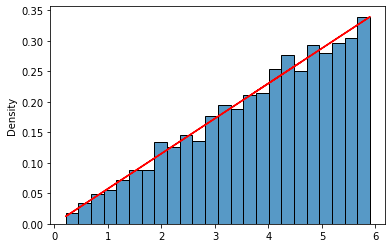

In [44]:
dens = [f(rhos[i]) for i in range(N)]
plt.plot(rhos,dens,c="red")
sns.histplot(rhos, stat='density')

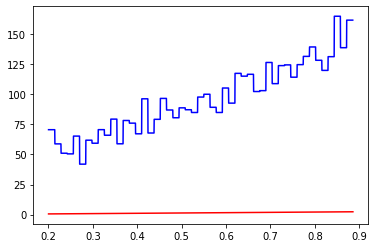

In [42]:
r = [i for i in rhos]
m = min(r)
bins=50
res = [0]*bins
step = (max(r) - m)/bins
parts = [j*step + m for j in range(bins)]

for i in range(len(parts)):
    for k in r:
        if (parts[i] - step) <= k <= parts[i]:
            res[i]+=(k/(np.pi*(parts[i])**2 - np.pi*(parts[i] - m)**2))
            
            
def sel_func(r):
    if r < parts[0]:
        return res[0]
    for i in range(1, len(parts)):
        if parts[i-1] <= r < parts[i]:
            return res[i]
a=m
xx = list()
for i in range(N):
    xx.append(a)
    a += float(parts[len(parts) - 1] + 1) / N
yy = [sel_func(xx[i]) for i in range(N)]
plt.plot(xx,yy,c="blue")
dens = [f(parts[i]) for i in range(bins)]
plt.plot(parts,dens,c="red")
plt.show()